# Reestruturação MVC com Heurísticas de Nielsen

Este notebook segue o padrão **MVC** (Model-View-Controller), organizando as funções para maior clareza e modularidade.  
Também aplicamos duas heurísticas de Nielsen:
- **Visibilidade do estado do sistema**: Mensagens informam o progresso em cada etapa.
- **Consistência e padrões**: Estrutura modular com células dedicadas para cada componente.

## Estrutura
1. **Model**: Gerenciamento de dados e lógica de previsão.
2. **View**: Apresentação de resultados, gráficos e outputs visuais.
3. **Controller**: Interação entre Model e View, coordenando inputs e outputs.

<h3>Model: Gerenciamento de Dados e Lógica</h3>

In [22]:
import pandas as pd

def carregar_dados(caminho_arquivo):
    return pd.read_csv(caminho_arquivo)

def processar_dados_veiculos(dados):
    return dados

def processar_dados_estacoes(dados):
    dados.columns = dados.columns.str.strip() 
    return dados

def limpar_dados_carregadores(dados):
    dados.columns = dados.columns.str.strip() 
    return dados


<h3>View: Apresentação dos Resultados</h3>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def exibir_top_50_cidades_com_mais_veiculos(dados):
    cidade_carros = dados['City'].value_counts().reset_index()
    cidade_carros.columns = ['City', 'Número de Veículos']
    top_50_cidades = cidade_carros.head(50)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_50_cidades, x='City', y='Número de Veículos')
    plt.title('Top 50 Cidades com Mais Veículos Elétricos', fontsize=14)
    plt.xlabel('Cidade', fontsize=12)
    plt.ylabel('Número de Veículos', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

def exibir_grafico_correlacao(cidade_carros, cidade_station, correlacao):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cidade_carros['Número de Veículos'], y=cidade_station['Número de Chargers'], alpha=0.6)
    plt.title(f'Correlação entre Número de Veículos e Carregadores (r = {correlacao:.2f})', fontsize=14)
    plt.xlabel('Número de Veículos', fontsize=12)
    plt.ylabel('Número de Carregadores', fontsize=12)
    plt.grid(True)
    plt.show()

    correlacao_df = pd.DataFrame({
        'City': cidade_carros['City'],
        'Número de Veículos': cidade_carros['Número de Veículos'],
        'Número de Carregadores': cidade_station['Número de Chargers'],
    })
    
    print("Tabela de Correlação entre Número de Veículos e Carregadores:")
    print(correlacao_df)
    print(f"\nCorrelação entre número de veículos e carregadores: {correlacao:.2f}")


<h3>Controller: Fluxo de Execução</h3>

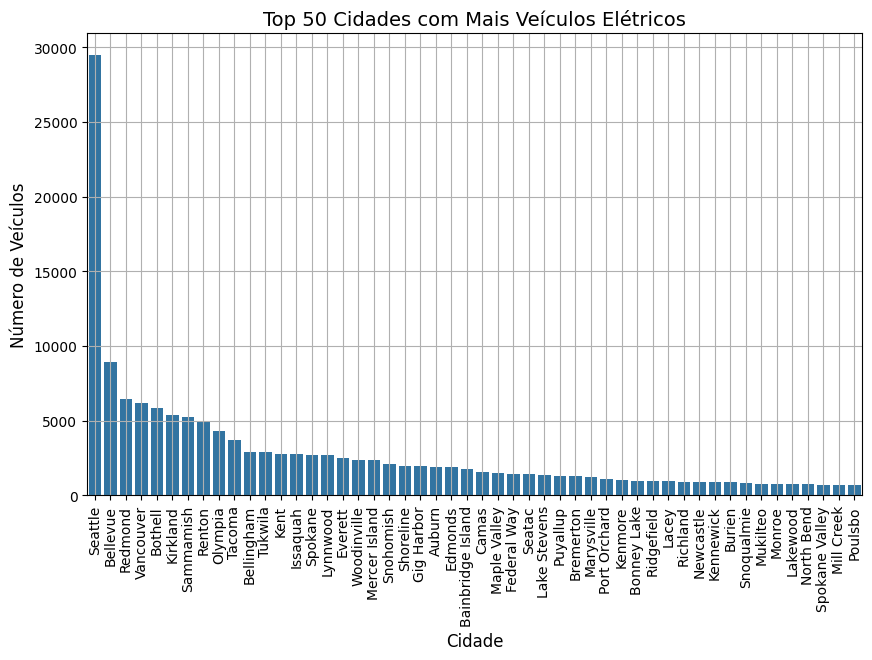

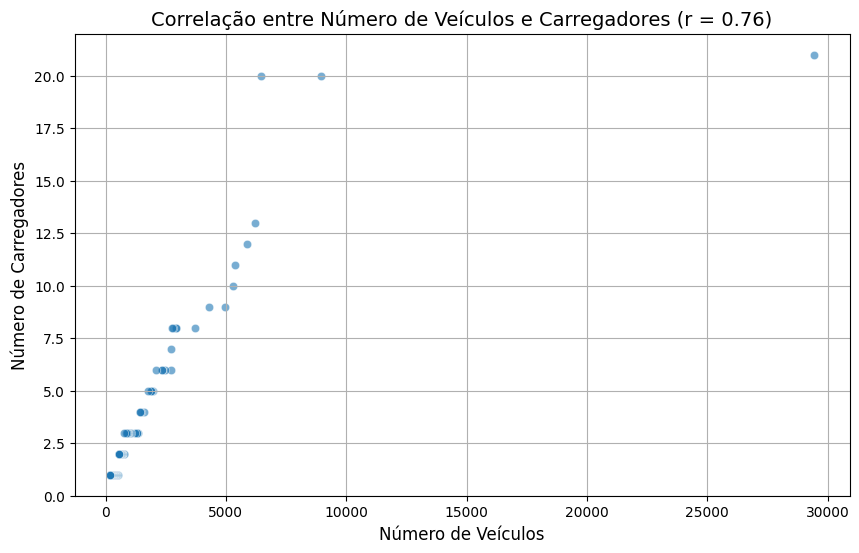

Tabela de Correlação entre Número de Veículos e Carregadores:
              City  Número de Veículos  Número de Carregadores
0          Seattle               29447                    21.0
1         Bellevue                8931                    20.0
2          Redmond                6478                    20.0
3        Vancouver                6193                    13.0
4          Bothell                5863                    12.0
..             ...                 ...                     ...
718       Plymouth                   1                     NaN
719          Tempe                   1                     NaN
720    Chapel Hill                   1                     NaN
721          Vista                   1                     NaN
722  Elizabethtown                   1                     NaN

[723 rows x 3 columns]

Correlação entre número de veículos e carregadores: 0.76


In [24]:
if __name__ == "__main__":
    caminho_ve = "Electric_Vehicle_Population_Data.csv"
    caminho_estacoes = "Electric_Vehicle_Charging_Stations.csv"
    caminho_estacoes_dv = "station_data_dataverse.csv"

    dados_ve = carregar_dados(caminho_ve)
    dados_estacoes = carregar_dados(caminho_estacoes)
    dados_estacoes_dv = carregar_dados(caminho_estacoes_dv)

    dados_ve = processar_dados_veiculos(dados_ve)
    dados_estacoes = processar_dados_estacoes(dados_estacoes)

    dados_estacoes_limpos = limpar_dados_carregadores(dados_estacoes)

    exibir_top_50_cidades_com_mais_veiculos(dados_ve) 

    cidade_carros = dados_ve['City'].value_counts().reset_index()
    cidade_carros.columns = ['City', 'Número de Veículos']
    
    cidade_station = dados_estacoes['City'].value_counts().reset_index()
    cidade_station.columns = ['City', 'Número de Chargers']
    
    correlacao = cidade_carros.merge(cidade_station, on='City', how='inner')['Número de Veículos'].corr(cidade_station['Número de Chargers'])

    exibir_grafico_correlacao(cidade_carros, cidade_station, correlacao)
